In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

In [2]:
filepath = 'Resources/Income by Country.csv'
sugar_file = 'Resources/sugar_per_person_g_per_day.csv'

df = pd.read_csv(filepath)
df_sug = pd.read_csv(sugar_file).rename(columns={'country': 'Country'})


In [3]:
#Create Merged Data Frame
merged_df = pd.merge(df, df_sug, on="Country", how="inner", suffixes= ("_Income", "_SugarIntake"))
merged_df2 = merged_df.set_index('Country')
merged_df2.head()

,1990,1991,1992,1993_Income,1994_Income,1995_Income,1996_Income,1997_Income,1998_Income,1999_Income,...,2004_SugarIntake,2005_SugarIntake,2006_SugarIntake,2007_SugarIntake,2008_SugarIntake,2009_SugarIntake,2010_SugarIntake,2011_SugarIntake,2012_SugarIntake,2013_SugarIntake
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2193,1841,1739,1208,877,1244,1130,1039,967,894,...,15.5,18.6,19.7,20.8,23.4,23.3,24.3,24.8,25.4,24.5
Albania,4415,3138,2857,3261,3600,4168,4594,4112,4530,5141,...,55.0,58.6,67.2,75.5,102.0,117.0,113.0,122.0,129.0,131.0
Algeria,9989,9457,9462,9171,8847,8904,9069,9099,9502,9596,...,84.3,75.5,77.9,86.7,78.5,85.3,85.6,74.9,82.8,78.2
Angola,4139,4528,1737,1704,1304,2858,2826,3335,3269,2952,...,39.3,37.1,38.3,39.5,44.1,40.2,38.9,40.1,42.7,44.7
Antigua and Barbuda,15749,16439,16475,17300,18021,16842,17665,18401,18943,19230,...,93.1,79.7,85.0,87.3,89.2,87.6,87.6,79.6,87.9,90.1


In [4]:
#Collect Income Data for past 10 years

new_income_df = merged_df2[["2003_Income", "2004_Income", "2005_Income", "2006_Income", "2007_Income", "2008_Income", "2009_Income", "2010_Income",
                    "2011_Income", "2012_Income", "2013_Income"]]

#new_income_df.head()

In [5]:
#Change Datatype from Object to Numeric
new_income_df = new_income_df.apply(pd.to_numeric, errors='ignore')
#new_income_df.dtypes

In [6]:
#Find 10 Year Average Income for each Country

transposed_df = new_income_df.T
country_income_avg = transposed_df.mean(axis=0)

#Create Dataframe
country_income_df = pd.DataFrame(country_income_avg)

In [7]:
#Collect Sugar Intake Data for past 10 years 

new_sugar_df = merged_df2[["2003_SugarIntake","2004_SugarIntake", "2005_SugarIntake", "2006_SugarIntake", "2007_SugarIntake", 
                    "2008_SugarIntake", "2009_SugarIntake", "2010_SugarIntake", "2011_SugarIntake", "2012_SugarIntake", "2013_SugarIntake"]]
new_sugar_df.head()


,2003_SugarIntake,2004_SugarIntake,2005_SugarIntake,2006_SugarIntake,2007_SugarIntake,2008_SugarIntake,2009_SugarIntake,2010_SugarIntake,2011_SugarIntake,2012_SugarIntake,2013_SugarIntake
Country,,,,,,,,,,,
Afghanistan,12.2,15.5,18.6,19.7,20.8,23.4,23.3,24.3,24.8,25.4,24.5
Albania,67.0,55.0,58.6,67.2,75.5,102.0,117.0,113.0,122.0,129.0,131.0
Algeria,82.8,84.3,75.5,77.9,86.7,78.5,85.3,85.6,74.9,82.8,78.2
Angola,41.5,39.3,37.1,38.3,39.5,44.1,40.2,38.9,40.1,42.7,44.7
Antigua and Barbuda,83.5,93.1,79.7,85.0,87.3,89.2,87.6,87.6,79.6,87.9,90.1


In [8]:
#Find 10 Year Average Sugar Intake for each Country

transposed_df2 = new_sugar_df.T
country_sugar_avg = transposed_df2.mean(axis=0)

#Create Dataframe
country_sugar_df = pd.DataFrame(country_sugar_avg)

transposed_df2

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Yemen,Zambia,Zimbabwe
2003_SugarIntake,12.2,67.0,82.8,41.5,83.5,128.0,87.6,128.0,127.0,44.9,...,124.0,105.0,111.0,192.0,99.1,12.3,42.5,70.3,32.8,75.0
2004_SugarIntake,15.5,55.0,84.3,39.3,93.1,131.0,85.1,128.0,130.0,42.6,...,131.0,105.0,114.0,194.0,97.3,13.2,43.5,69.5,31.9,72.4
2005_SugarIntake,18.6,58.6,75.5,37.1,79.7,136.0,94.1,128.0,136.0,48.8,...,135.0,110.0,103.0,193.0,97.4,22.6,42.6,70.0,30.0,67.5
2006_SugarIntake,19.7,67.2,77.9,38.3,85.0,133.0,92.8,127.0,134.0,50.5,...,142.0,103.0,90.5,187.0,98.0,34.2,39.1,73.1,31.2,73.1
2007_SugarIntake,20.8,75.5,86.7,39.5,87.3,134.0,94.0,130.0,129.0,37.0,...,144.0,88.9,99.0,175.0,97.6,56.1,51.0,74.3,27.0,64.9
2008_SugarIntake,23.4,102.0,78.5,44.1,89.2,133.0,98.9,129.0,134.0,39.6,...,144.0,89.7,99.9,170.0,100.0,33.4,52.8,73.6,26.4,61.1
2009_SugarIntake,23.3,117.0,85.3,40.2,87.6,132.0,103.0,126.0,128.0,40.0,...,132.0,94.1,106.0,165.0,104.0,28.6,54.3,74.7,28.5,61.1
2010_SugarIntake,24.3,113.0,85.6,38.9,87.6,131.0,112.0,126.0,132.0,43.4,...,129.0,107.0,100.0,167.0,106.0,28.3,54.7,78.6,28.0,65.8
2011_SugarIntake,24.8,122.0,74.9,40.1,79.6,132.0,101.0,127.0,131.0,44.2,...,133.0,95.3,110.0,172.0,109.0,27.9,55.5,81.4,28.4,68.9
2012_SugarIntake,25.4,129.0,82.8,42.7,87.9,131.0,101.0,126.0,130.0,48.3,...,131.0,98.8,106.0,174.0,111.0,27.7,49.8,79.8,30.1,79.0


In [9]:
#Created merged data frame of Income & Sugar Averages
final_df = pd.merge(country_income_df, country_sugar_df, on="Country", how="inner", suffixes= ("_Income", "_SugarIntake"))
final_df2 = final_df.rename(columns={'0_Income': 'AverageDecadeIncome',
                                     '0_SugarIntake': 'AverageDecadeSugarIntake'})
final_df2

,AverageDecadeIncome,AverageDecadeSugarIntake
Country,,
Afghanistan,1441.000000,21.136364
Albania,8894.090909,94.300000
Algeria,12279.363636,81.136364
Angola,5271.272727,40.581818
Antigua and Barbuda,21342.545455,86.418182
...,...,...
Uzbekistan,3922.545455,28.354545
Vanuatu,2692.454545,48.836364
Yemen,3566.272727,74.836364


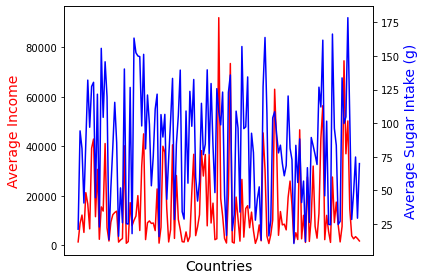

<Figure size 432x288 with 0 Axes>

In [10]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(final_df2.AverageDecadeIncome, color="red")
# set x-axis label
ax.set_xlabel("Countries",fontsize=14)
# set y-axis label
ax.set_ylabel("Average Income",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(final_df2.AverageDecadeSugarIntake,color="blue")
ax2.set_ylabel("Average Sugar Intake (g)",color="blue",fontsize=14)

plt.xticks([])
plt.tight_layout()
plt.show()

plt.savefig('GlobalIncomeSug.png')

In [11]:
#Find Top 5 Countries for Highest Average Income
top_5 = final_df2.sort_values(by=['AverageDecadeIncome'], ascending=False).head(5)
top_5

,AverageDecadeIncome,AverageDecadeSugarIntake
Country,,
Kuwait,91996.909091,108.545455
United Arab Emirates,74579.000000,99.800000
Luxembourg,73493.272727,135.909091
Norway,63097.909091,108.545455
Switzerland,56452.090909,161.818182


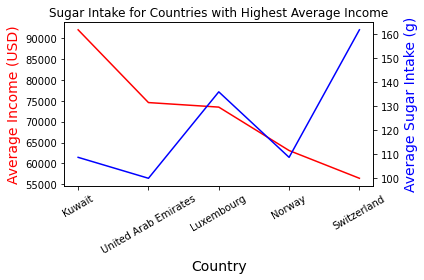

<Figure size 432x288 with 0 Axes>

In [12]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(top_5.AverageDecadeIncome, color="red")
# set x-axis label
ax.set_xlabel("Country",fontsize=14)
plt.xticks(rotation=30)
# set y-axis label
ax.set_ylabel("Average Income (USD)",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(top_5.AverageDecadeSugarIntake,color="blue")
ax2.set_ylabel("Average Sugar Intake (g)",color="blue",fontsize=14)

plt.title("Sugar Intake for Countries with Highest Average Income")

plt.tight_layout()
plt.show()

plt.savefig('HighestIncomeCountries.png')

plt.scatter(country_income_df, country_sugar_df)
plt.title ('Average Sugar Income vs Average Sugar Intake (2002-2013)')
plt.xlabel('Mean Income (USD)')
plt.ylabel('Average Sugar Intake(g)')

plt.show()

In [13]:
#Calculate Correlation Coefficient
#sts.pearsonr(final_df2.AverageDecadeIncome, final_df2.AverageDecadeSugarIntake)

In [14]:
#Calculate Linear Regression
#model=sts.linregress(final_df2.AverageDecadeIncome, final_df2.AverageDecadeSugarIntake)
#model

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(final_df2.AverageDecadeIncome, final_df2.AverageDecadeSugarIntake)

The correlation coefficient between income vs sugar consumption is 0.54
slope = 0.001367, intercept = 62.18, r-value = 0.54, p-value = 0.0, standard error = 0.0


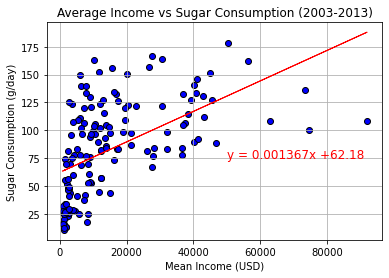

In [16]:
#Plot Linear Regression

plt.scatter(country_income_df, country_sugar_df, marker="o", facecolors="blue", edgecolors="black")
plt.title ('Average Income vs Sugar Consumption (2003-2013)')
plt.xlabel('Mean Income (USD)')
plt.ylabel('Sugar Consumption (g/day)')
plt.grid()

# Calculate the values for the regression line (y=mx+b)
best_fit = slope * country_income_df + intercept

# Format the regression line formula to be displayed on the graph
best_fit_equation = "y = " + str(round(slope, 6)) + "x +" + str(round(intercept, 2))

# Output of correlation coefficient and linear regression model
print(f"The correlation coefficient between income vs sugar consumption is {round(rvalue,2)}")
print(f"slope = {round(slope,6)}, intercept = {round(intercept,2)}, r-value = {round(rvalue, 2)}, p-value = {round(pvalue,2)}, standard error = {round(stderr,2)}")

# Plot regression line
plt.plot(country_income_df,best_fit,linewidth = 1,color="red")
# Plot regression formula on graph
plt.annotate(best_fit_equation, (50000, 75), fontsize=12, color='red')

plt.savefig("Income vs Sugar Consumption")